In [1]:
#!pip install kagglehub

In [2]:
from textblob import TextBlob
import textstat
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

C:\Users\qtg4ys\Documents\DS3001\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\qtg4ys\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77


In [4]:
import os
import pandas as pd
import numpy as np

dataset_path = kagglehub.dataset_download('saurabhshahane/fake-news-classification')

print("Path to dataset files:", dataset_path)

raw_dataset = os.path.join(dataset_path, 'WELFake_Dataset.csv')
df = pd.read_csv(raw_dataset)

print(df.head())

Path to dataset files: C:\Users\qtg4ys\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


Text(0.5, 1.0, 'Fake vs Real Articles Count')

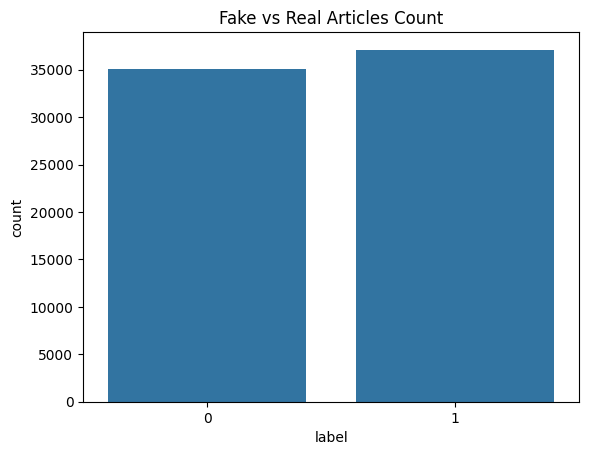

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.title("Fake vs Real Articles Count")

In [6]:
# missing
print("Missing Rows:", df.isna().sum())

# duplicates
print("Duplicate rows:", df.duplicated().sum())

Missing Rows: Unnamed: 0      0
title         558
text           39
label           0
dtype: int64
Duplicate rows: 0


Text(0.5, 1.0, 'Word Count — Fake vs Real')

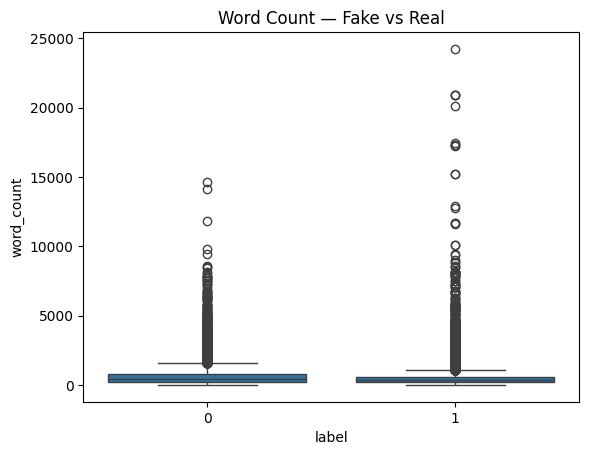

In [7]:
df["word_count"] = df["text"].apply(lambda t: len(str(t).split()))
df["char_count"] = df["text"].apply(lambda t: len(str(t)))

sns.boxplot(x="label", y="word_count", data=df)
plt.title("Word Count — Fake vs Real")

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#top word counts from fake and real news articles
df_clean = df.dropna(subset=["text"])

fake_text = df_clean[df_clean["label"] == 0]["text"]
real_text = df_clean[df_clean["label"] == 1]["text"]

cv = CountVectorizer(stop_words="english", max_features=20)

fake_counts = cv.fit_transform(fake_text)
fake_words = pd.DataFrame({
    "word": cv.get_feature_names_out(),
    "count": fake_counts.toarray().sum(axis=0)
}).sort_values(by="count", ascending=False)

real_counts = cv.fit_transform(real_text)
real_words = pd.DataFrame({
    "word": cv.get_feature_names_out(),
    "count": real_counts.toarray().sum(axis=0)
}).sort_values(by="count", ascending=False)

fake_words, real_words


(          word   count
 12        said  184607
 17       trump  107201
 5           mr   66086
 9    president   51300
 6          new   42528
 8       people   41792
 13       state   38871
 14      states   31668
 2   government   30110
 11     reuters   29342
 3        house   28578
 1      clinton   28569
 19        year   28154
 18      united   27740
 10  republican   26548
 4         like   24796
 16        told   23991
 0     campaign   23383
 15        time   23335
 7        obama   22955,
           word   count
 17       trump  106364
 14        said   49712
 12      people   48653
 1      clinton   45411
 13   president   38982
 6         just   34612
 7         like   31766
 5      hillary   31592
 11       obama   28615
 9          new   28334
 16        time   26155
 15       state   25340
 2       donald   24955
 10        news   21866
 0     american   20847
 8        media   20393
 3     election   20309
 4   government   20190
 19       world   19811
 18       white

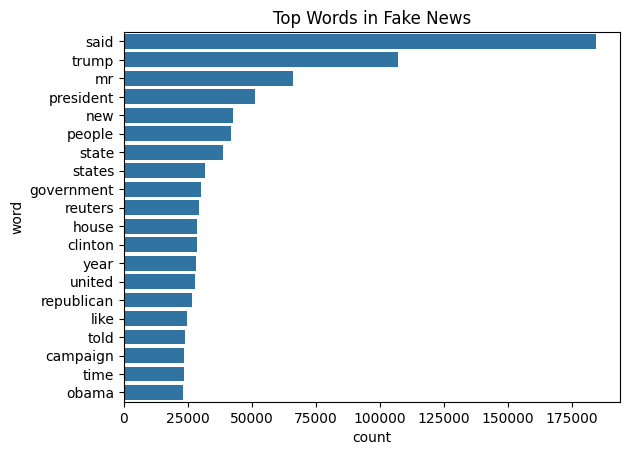

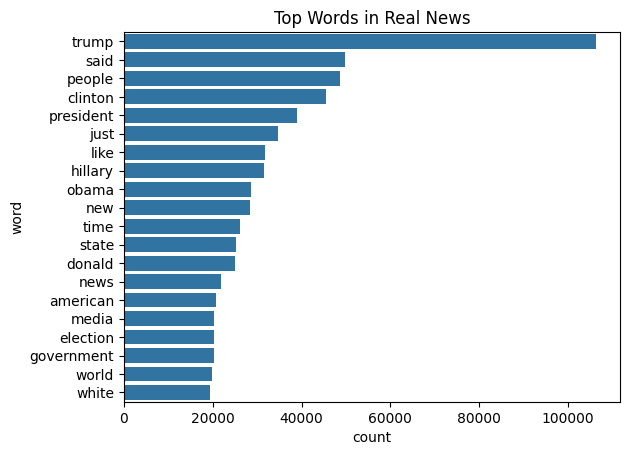

In [9]:
#plots of word counts
sns.barplot(
    data=fake_words,
    x="count",
    y="word"
)
plt.title("Top Words in Fake News")
plt.show()

sns.barplot(
    data=real_words,
    x="count",
    y="word"
)
plt.title("Top Words in Real News")
plt.show()

In [11]:
#sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df_clean["vader_compound"] = df_clean["text"].apply(lambda t: analyzer.polarity_scores(t)["compound"])
sns.histplot(
    data=df_clean,
    x="vader_compound",
    hue="label",
    bins=30,
    kde=True
)
plt.title("VADER Sentiment Distribution: Fake vs Real")

KeyboardInterrupt: 

In [12]:
#readibility metrics
df_clean["flesch"] = df_clean["text"].apply(lambda t: textstat.flesch_reading_ease(str(t)))

sns.boxplot(x="label", y="flesch", data=df_clean)

KeyboardInterrupt: 

C:\Users\qtg4ys\AppData\Local\Temp\ipykernel_66596\2766944691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["word_count"] = df_clean["text"].apply(lambda t: len(str(t).split()))


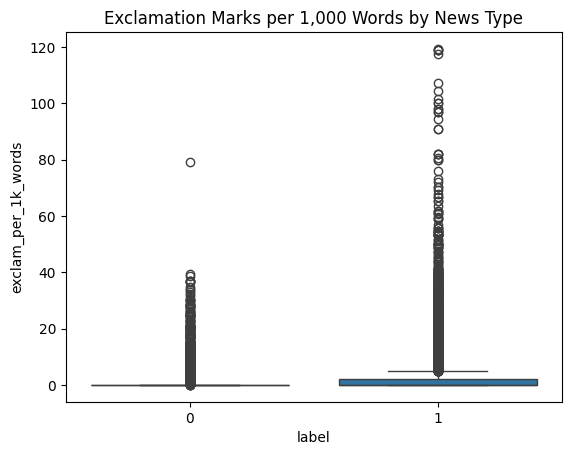

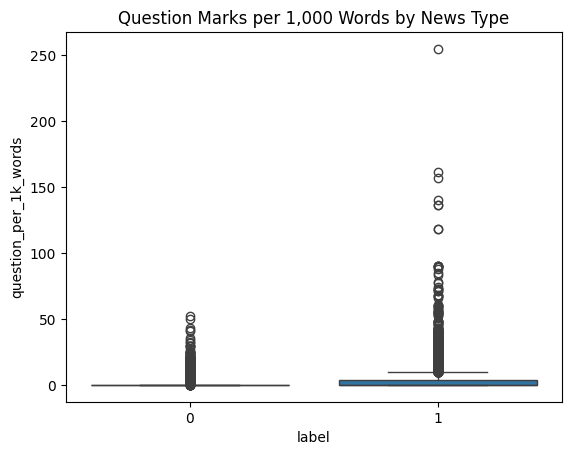

In [13]:
#punctuation counts
df_clean["word_count"] = df_clean["text"].apply(lambda t: len(str(t).split()))
df_clean = df_clean[df_clean["word_count"] >= 50]
df_clean["exclamations"] = df_clean["text"].apply(lambda t: str(t).count("!"))
df_clean["questions"] = df_clean["text"].apply(lambda t: str(t).count("?"))

df_clean["exclam_per_1k_words"] = (
    df_clean["exclamations"] / df_clean["word_count"]
) * 1000

df_clean["question_per_1k_words"] = (
    df_clean["questions"] / df_clean["word_count"]
) * 1000

sns.boxplot(
    x="label",
    y="exclam_per_1k_words",
    data=df_clean
)
plt.title("Exclamation Marks per 1,000 Words by News Type")
plt.show()

sns.boxplot(
    x="label",
    y="question_per_1k_words",
    data=df_clean
)
plt.title("Question Marks per 1,000 Words by News Type")
plt.show()
